## Algorithm from "Graph topology plays a determinant role
## in the evolution of cooperation", code by Ana Laura Chioca

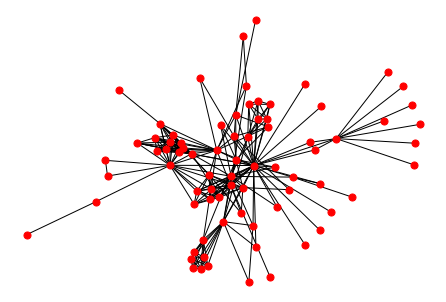

In [78]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# G = nx.scale_free_graph(100)
G= nx.read_edgelist("lesmis.txt", nodetype=int, data=(('weight',float),)) # Read the network
G = nx.convert_node_labels_to_integers(G, first_label=0)
# G.nodes()
G = G.to_undirected() #Remove a direcao dos links

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="r", node_size=50, with_labels=False)
plt.show(True)


In [79]:
attrs = {}
N = len(G) #number of nodes in Graph

x = list(range(0, N))
y = []

# choose N/2 nodes. They are going to be set as cooperators
for n in range (0, int(N/2)):
    aux = random.choice(x)
    while(aux in y): aux = random.choice(x)
    y.append(aux)

count = 0
for n in range (0, N):
    if n in y:
        attrs[n] = {"P": 0, "Behaviour": "Cooperator"}
        count += 1
    else: attrs[n] = {"P": 0, "Behaviour": "Detractor"}

print("{}/{} are coops".format(count, N))

nx.set_node_attributes(G, attrs)
nx.write_gml(G, "./CompleteGraph2.gml")

38/77 are coops


In [80]:
# Declaring constants
nGenerations = 100
b = 1
R = 1
P = S = 0

In [81]:
def updateStrategies(G):
    # for each node, update it's strategy based on a randomly chosen neighbour
    for i in range(len(G)):
        # choose, randomly, a neighbour from the list of i's neighbours
        neigh = list(G.neighbors(i))
        rand = random.randrange(0,len(neigh))
        
        # P is the fitness of each node
        Px = G.nodes[i]["P"]
        Py = G.nodes[neigh[rand]]["P"]

        # find the max degree between both nodes
        degreex = G.degree(i)
        degreey = G.degree(neigh[rand])
        kmax = max(degreex, degreey)
        # print("Px = {} Py = {}".format(Px, Py))
        # print("Kx = {} Ky = {}".format(degreex, degreey))

        aux = (Py - Px)/(kmax*b)
        p = max(0, aux)

        # replace strategy with "p" probability
        rand2 = random.random()
        if (rand2 <= p):
            G.nodes[i]["Behaviour"] = G.nodes[neigh[rand]]["Behaviour"]



In [82]:
for n in range(nGenerations):
    # print("gen {}".format(n))
    for edge in G.edges:
        source, target = edge
        if(G.nodes[source]["Behaviour"] == "Detractor"):
            if(G.nodes[target]["Behaviour"] == "Cooperator"): 
                G.nodes[source]["P"] += b
        if(G.nodes[source]["Behaviour"] == "Cooperator"):
            if(G.nodes[target]["Behaviour"] == "Cooperator"): 
                G.nodes[source]["P"] += R
                G.nodes[target]["P"] += R
            if(G.nodes[target]["Behaviour"] == "Detractor"): 
                G.nodes[target]["P"] += b
    # after the end of each generation, update strategies
    updateStrategies(G)
    
nx.write_gml(G, "./CompleteGraph3.gml")